In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sys

In [2]:
red = pd.read_csv("winequality-red.csv", sep=";")
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
white = pd.read_csv("winequality-white.csv", sep=";")
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### A. Параметры и качество белого вина (12 признаков, 4898 образцов) по данным второго файла,

In [4]:
def print_data(data: pd.DataFrame):
    print(f"Размерность: {data.shape}")
    display(data.head())


data_A = white.copy()
print_data(data_A)

Размерность: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


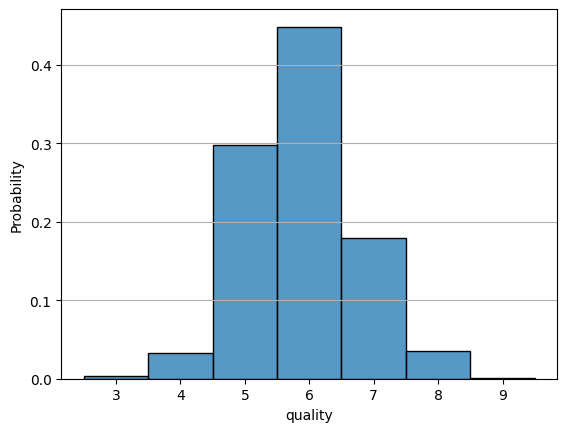

In [5]:
def quality_hist(data: pd.DataFrame):
    sns.histplot(data, x="quality", discrete=True, stat="probability")
    plt.grid(axis="y")

quality_hist(data_A)

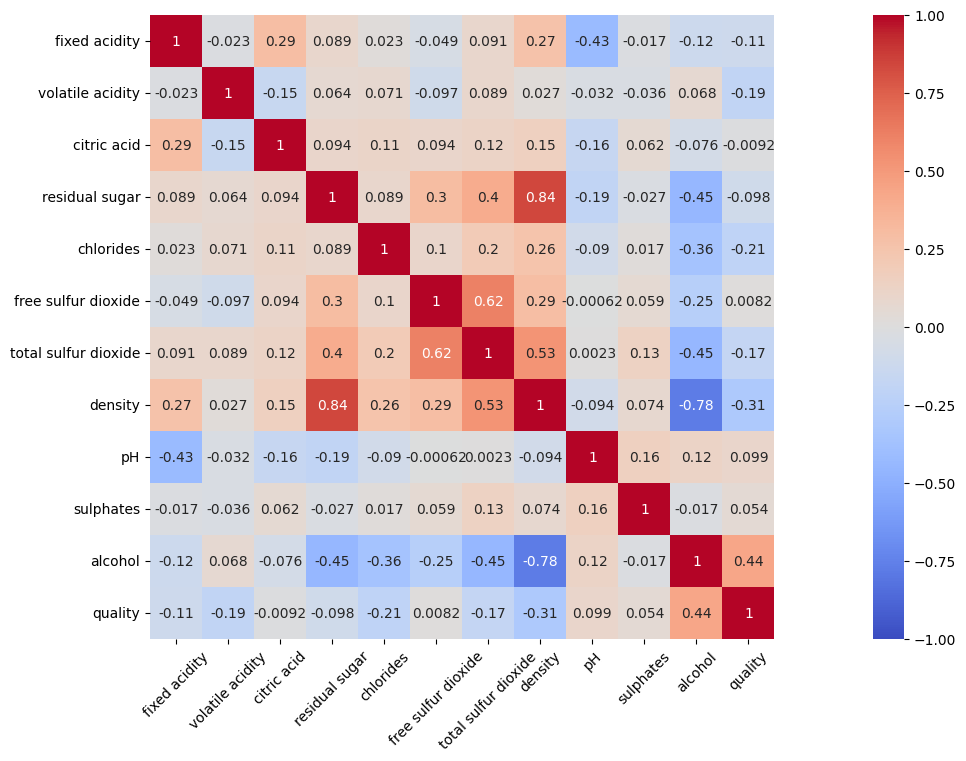

In [6]:
def corrmap(data: pd.DataFrame):
    plt.figure(figsize=(20, 8))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, square=True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    
corrmap(data_A)

In [7]:
def standartize(data: pd.DataFrame) -> pd.DataFrame:
    nenorm = data.copy()
    numeric = data.drop(columns=["quality", "is_red"], errors='ignore')
    args = numeric.agg(("mean", "std"))
    norm = (numeric - args.loc["mean"]) / args.loc["std"]
    nenorm[list(norm.columns.values)] = norm
    display(norm.describe())
    return nenorm

data_A_norm = standartize(data_A)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,-3.481630e-16,4.468092e-16,2.321087e-17,-1.109770e-16,3.075440e-16,-1.378145e-17,-4.642174e-17,3.244880e-14,-1.195360e-15,-8.218098e-16,-3.713739e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.619982e+00,-1.966784e+00,-2.761461e+00,-1.141827e+00,-1.683102e+00,-1.958477e+00,-3.043919e+00,-2.312802e+00,-3.101091e+00,-2.364468e+00,-2.043089e+00
25%,-6.574340e-01,-6.770318e-01,-5.304215e-01,-9.249530e-01,-4.472890e-01,-7.237012e-01,-7.144009e-01,-7.706280e-01,-6.507699e-01,-6.996389e-01,-8.241915e-01
50%,-6.492444e-02,-1.809733e-01,-1.172660e-01,-2.348977e-01,-1.268931e-01,-7.691388e-02,-1.026084e-01,-9.608339e-02,-5.474574e-02,-1.739035e-01,-9.285319e-02
75%,5.275851e-01,4.142970e-01,4.611517e-01,6.917479e-01,1.935028e-01,6.286722e-01,6.738976e-01,6.929749e-01,6.075033e-01,5.270772e-01,7.197450e-01
max,8.704217e+00,8.152811e+00,1.095530e+01,1.171292e+01,1.374167e+01,1.491679e+01,7.097720e+00,1.502976e+01,4.183648e+00,5.171074e+00,2.995020e+00


### B. Параметры и качество вина Vinho Verde (12 признаков, 6497 образцов), по данным обоих файлов.

In [8]:
data_B = pd.concat((red, white), ignore_index=True)
print_data(data_B)

Размерность: (6497, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


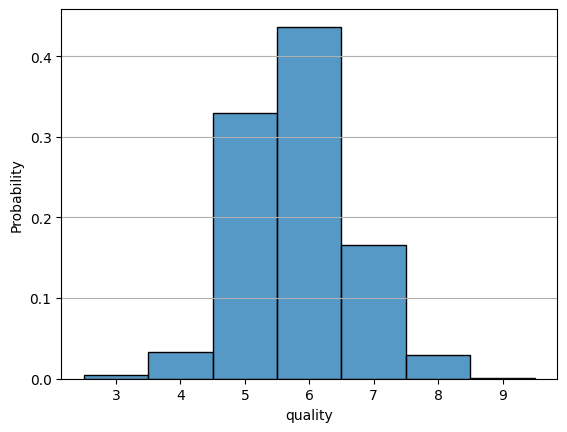

In [9]:
quality_hist(data_B)

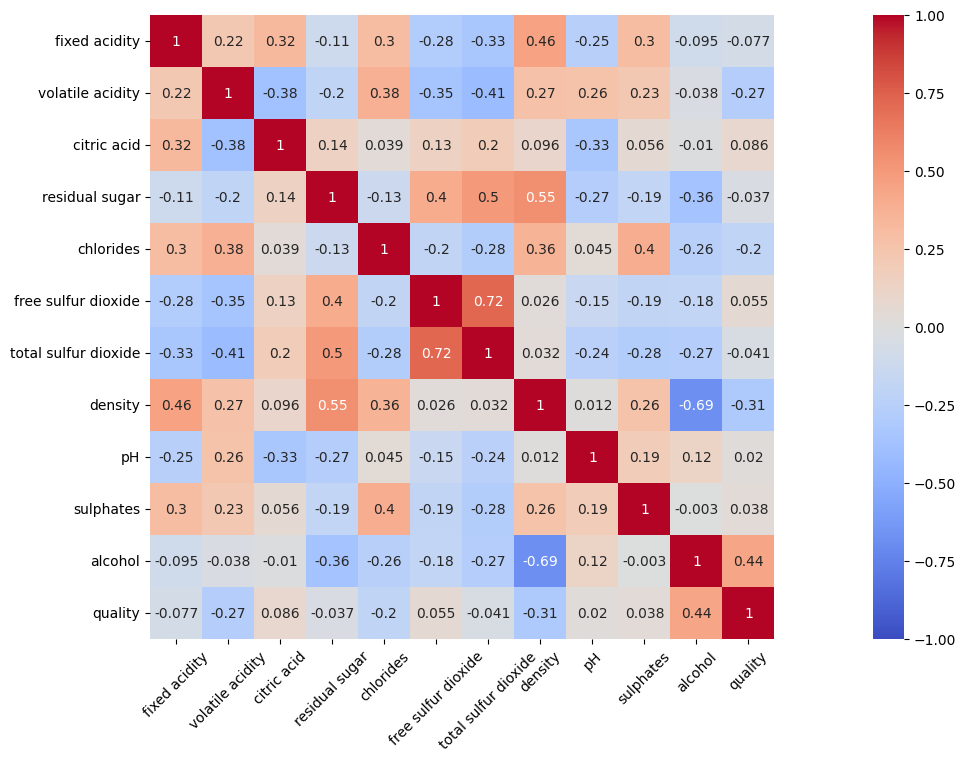

In [10]:
corrmap(data_B)

In [11]:
data_B_norm = standartize(data_B)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-4.549573e-16,1.049902e-16,2.624754e-17,5.249508e-17,1.749836e-17,-1.049902e-16,0.000000,-3.552167e-15,2.729744e-15,-4.899540e-16,9.799081e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.634386e+00,-1.577208e+00,-2.192664e+00,-1.017956e+00,-1.342536e+00,-1.663455e+00,-1.941631,-2.529997e+00,-3.100376e+00,-2.091774e+00,-2.089189e+00
25%,-6.288845e-01,-6.661100e-01,-4.722972e-01,-7.657389e-01,-5.147590e-01,-7.620156e-01,-0.685480,-7.858922e-01,-6.748102e-01,-6.805395e-01,-8.315512e-01
50%,-1.660764e-01,-3.016707e-01,-5.940918e-02,-5.135217e-01,-2.578628e-01,-8.593639e-02,0.039904,6.448391e-02,-5.287017e-02,-1.429263e-01,-1.608107e-01
75%,3.738663e-01,3.664680e-01,4.911081e-01,5.584015e-01,2.559297e-01,5.901428e-01,0.712210,7.647937e-01,6.312639e-01,4.618885e-01,6.776148e-01
max,6.698910e+00,7.533774e+00,9.230570e+00,1.268585e+01,1.584097e+01,1.456245e+01,5.736815,1.476765e+01,4.922650e+00,9.870119e+00,3.695947e+00


### C. Параметры и качество вина Vinho Verde (13 признаков, 6497 образцов), по данным обоих файлов, введя бинарный признак для отличия красного и белого вина.

In [12]:
red_ = red.copy()
red_.insert(11, "is_red", 1)
white_ = white.copy()
white_.insert(11, "is_red", 0)
data_C = pd.concat((red_, white_), ignore_index=True)

print_data(data_C)

Размерность: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5


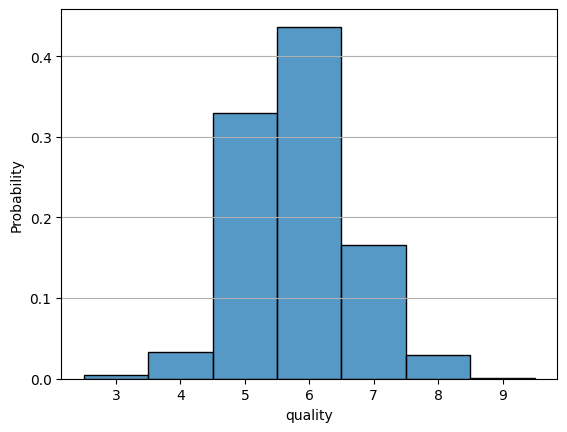

In [13]:
quality_hist(data_C)

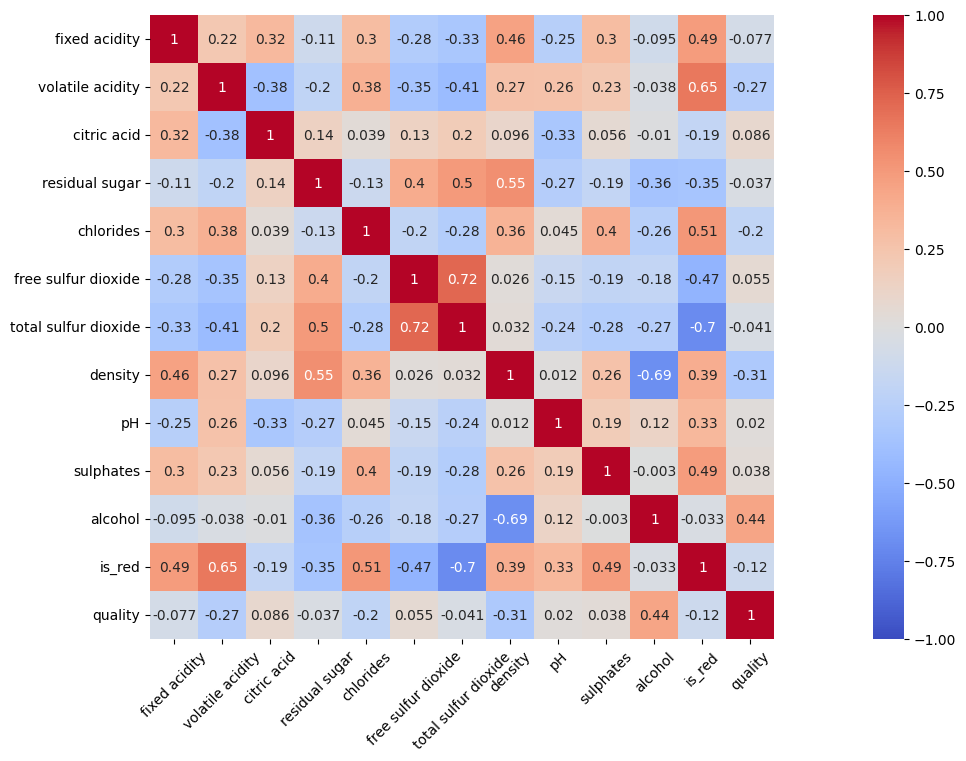

In [14]:
corrmap(data_C)

In [15]:
data_C_norm = standartize(data_C)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03
mean,-4.549573e-16,1.049902e-16,2.624754e-17,5.249508e-17,1.749836e-17,-1.049902e-16,0.000000,-3.552167e-15,2.729744e-15,-4.899540e-16,9.799081e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.634386e+00,-1.577208e+00,-2.192664e+00,-1.017956e+00,-1.342536e+00,-1.663455e+00,-1.941631,-2.529997e+00,-3.100376e+00,-2.091774e+00,-2.089189e+00
25%,-6.288845e-01,-6.661100e-01,-4.722972e-01,-7.657389e-01,-5.147590e-01,-7.620156e-01,-0.685480,-7.858922e-01,-6.748102e-01,-6.805395e-01,-8.315512e-01
50%,-1.660764e-01,-3.016707e-01,-5.940918e-02,-5.135217e-01,-2.578628e-01,-8.593639e-02,0.039904,6.448391e-02,-5.287017e-02,-1.429263e-01,-1.608107e-01
75%,3.738663e-01,3.664680e-01,4.911081e-01,5.584015e-01,2.559297e-01,5.901428e-01,0.712210,7.647937e-01,6.312639e-01,4.618885e-01,6.776148e-01
max,6.698910e+00,7.533774e+00,9.230570e+00,1.268585e+01,1.584097e+01,1.456245e+01,5.736815,1.476765e+01,4.922650e+00,9.870119e+00,3.695947e+00


# Основное задание 1


Все пункты этого задания выполнить с датасетом А, полагая, что качество вина (от 0 до 10) – это его класс. Т.е. решить задачу множественной классификации. Реализовать ИНС по типу MLP с обратным распространением ошибки.

In [ ]:
class NeuralNetMLP:
    def __init__(self, n_hidden:int = 30,
                 l2:float = 0.,
                 epochs:int = 100,
                 eta:float = 0.001,
                 shuffle:bool = True,
                 minibatch_size:int = 1,
                 seed:int|None = None
                 ):
        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size
        self.w_h = None
        self.w_out = None
        self.b_h = None
        self.b_out = None
    
    def sigmoid(self, x):
        return 1 / (1+ np.exp(-x))
    
        
    def _onehot(self, y, n_classes):
        onehot = np.zeros((n_classes, y.shape[0]))
        for i in range(y.shape[0]):
            onehot[y[i], i] = 1.
        return onehot.T
    
    def _compute_cost(self, y_tr, output):
        L2_term = (self.l2 * (np.sum(self.w_h ** 2.) 
                              + np.sum(self.w_out ** 2.)))
        term1 = -y_tr * (np.log(output))
        term2 = -(1. - y_tr) * (np.log(1. - output))
        cost = np.sum(term1 - term2) + L2_term
        return cost
    
    def _forward(self, X):
        z_h = np.dot(X, self.w_h) + self.b_h
        a_h = self.sigmoid(z_h)
        z_out = np.dot(a_h , self.w_out) + self.b_out
        a_out = self.sigmoid(z_out)
        return z_h, a_h, z_out, a_out
    
    def predict(self, X):
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(a_out, axis=1)
        return y_pred
    
    def fit(self, X_train, y_train, X_test, y_test):
        n_output = np.unique(y_train).shape[0]
        n_features = X_train.shape[1]
        
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, 
                                      scale=0.1,
                                      size=(n_features, self.n_hidden)
                                      )
        
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0,
                                        scale=0.1,
                                        size=(self.n_hidden, n_output)
                                        )
        
        epoch_strlen = len(str(self.epochs))
        self.eval_ = {
            'cost': [],
            'train_acc' : [],
            'valid_acc' : [],
        }
        y_train_enc = self._onehot(y_train, n_output)
        
        for i in range(self.epochs):
            indices = np.arange(X_train.shape[0])
            
            if self.shuffle:
                self.random.shuffle(indices)
                
            for start_idx in range(0, 
                                   indices.shape[0] - self.minibatch_size + 1,
                                   self.minibatch_size
                                   ):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])
                
                delta_out = a_out - y_train_enc[batch_idx]
                sigmoid_der_h = a_h * (1. - a_h)
                
                grad_w_out = np.dot(a_h.T, delta_out)
                grad_b_out = np.sum(delta_out, axis=0)
                
                delta_h = (np.dot(delta_out, self.w_out.T) * sigmoid_der_h)
                
                grad_w_h = np.dot(X_train[batch_idx], delta_h)
                grad_b_h = np.sum(delta_h, axis=0)
                
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h
                
                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])
                
                cost = self._compute_cost(y_tr=y_train_enc,
                                            output=a_out)
                y_train_pred = self.predict(X_train)
                y_test_pred = self.predict(X_test)
                
                train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) / 
                                X_train.shape[0])
                test_acc = ((np.sum(y_test == y_test_pred)).astype(np.float) / 
                                X_test.shape[0])
                sys.stderr.write('\r%0*d/%d | Cost: %.2f'
                                    '| Train/Test Acc.: %.2f%%/%.2f%%' %
                                    (epoch_strlen, i+1, self.epochs, cost, train_acc*100, test_acc*100))
                sys.stderr.flush()
                
                self.eval_['cost'].append(cost)
                self.eval_['train_acc'].append(train_acc)
                self.eval_['test_acc'].append(test_acc)
            
        return self
            

                
                

### 1. Разделите датасет на обучающую (≈85%) и тестовую (≈15%) выборки.

In [37]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_A.drop(columns=['quality']).to_numpy(), data_A['quality'].to_numpy(),
                                                    random_state=42,
                                                    test_size=0.15
                                                    )

In [43]:
model = NeuralNetMLP(n_hidden=12)
model.fit(X_train, y_train, X_test, y_test)

IndexError: index 7 is out of bounds for axis 0 with size 7